In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r'/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.shape

(1470, 35)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **trend of Age and Business Travel and department**

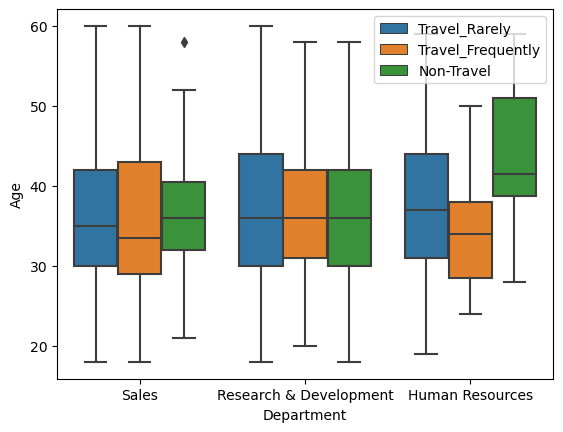

In [7]:
sns.boxplot(df , x = 'Department' , y = 'Age', hue = 'BusinessTravel')
plt.legend()

> **1. For sales Department more or less age differance is same for travel type**

> **2. For RnD department ages are same for each and every travel type**

> **3. For HR department those who having avg age between 35 to 40 they have travelled rarely or frequently but average age of more than 40 dont want  to do travel for business purpose**

# **Trend between age department and daily rate**

<Axes: xlabel='DailyRate', ylabel='Department'>

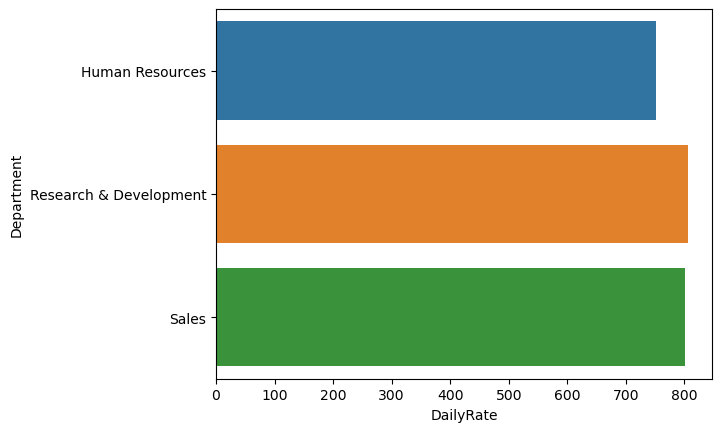

In [8]:
daily_rate_df = pd.DataFrame(df.groupby('Department')['DailyRate'].mean())
sns.barplot(daily_rate_df,x = 'DailyRate' , y = daily_rate_df.index )

> **RnD department salary is maximum and HR department department salary is minimum**

# **Age and Distance from home trend**

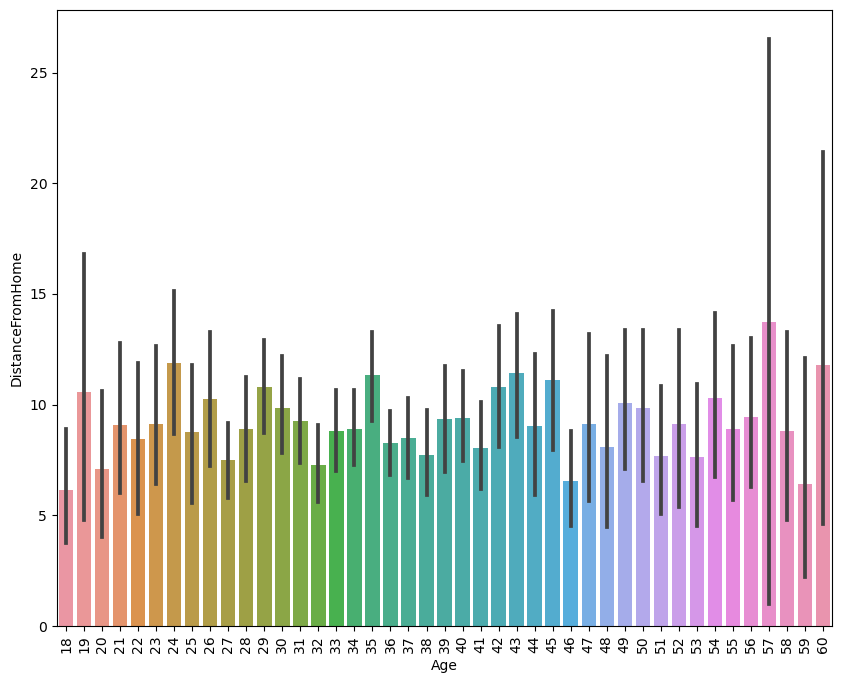

In [9]:
plt.figure(figsize = (10,8))
sns.barplot(df , x = 'Age' , y = 'DistanceFromHome')
plt.xticks(rotation= 90);

> **There is no special distribution between Age and Distance from home irrespective of age they came from any distance**

# **Department and Education trend**

In [10]:
dept_ed_df = pd.DataFrame(df.groupby('Department')['Education'].mean())

<Axes: xlabel='Education', ylabel='Department'>

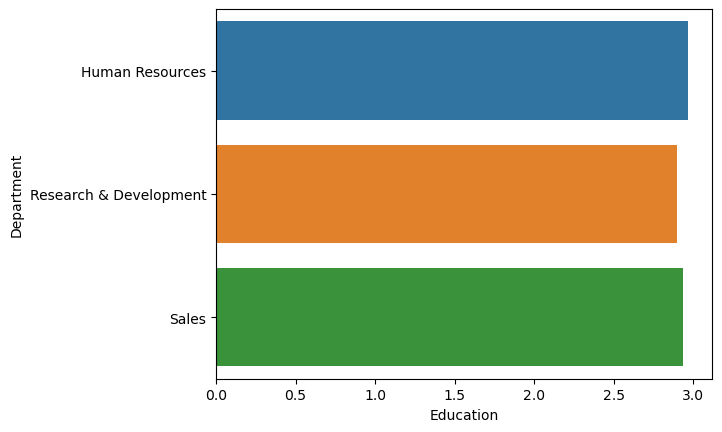

In [11]:
sns.barplot(dept_ed_df , x = 'Education' , y = dept_ed_df.index)

> **Human Resources dept having employees with more educational year**

# **What are the different educational field is available and their count on employees with respect to their respective department**

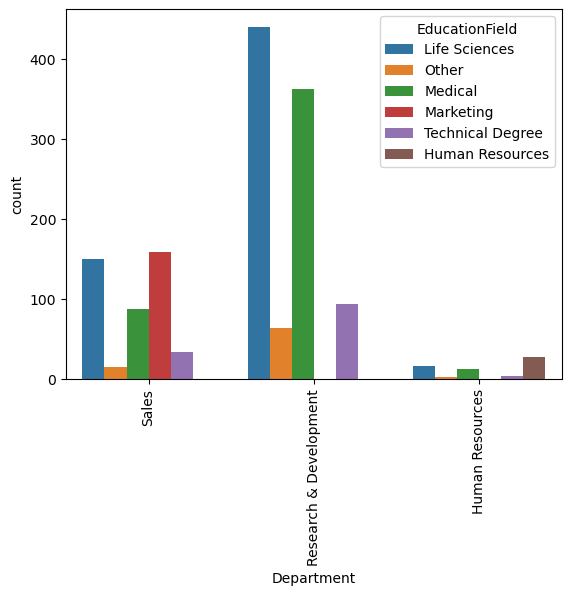

In [12]:
sns.countplot(df , x = 'Department',hue = 'EducationField')
plt.xticks(rotation = 90);

> **In sales maximum employees came from marketing backgroiund**

> **In RnD department Life Science and Medical background**

> **In HR department candidates from HR bacjground are more**

# **trend of employees in every educational background as per their education year**

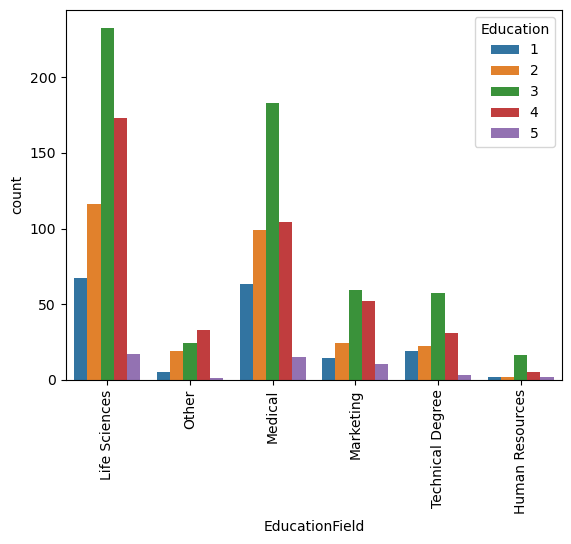

In [13]:
sns.countplot(df , x = 'EducationField' , hue = 'Education')
plt.xticks(rotation = 90);

> **as we know in RnD department we have maximum employees from Lifescience and Medical and here we have employees under this 2 degree have completed their 3 year course even in each every degree employees have completed 3 years course**

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# **Trend of working environment satisfaction as per department**

In [15]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

<Axes: xlabel='Department', ylabel='count'>

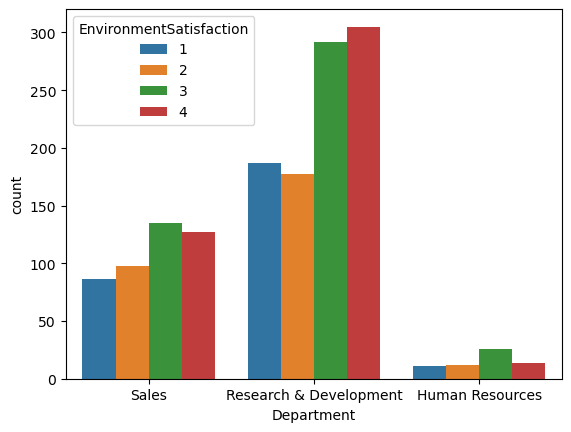

In [16]:
sns.countplot(df, hue = 'EnvironmentSatisfaction' , x ='Department' )

> **1. there is employee satisfaction in Sales deparment but some 150 employee found it is not workable**

> **2. in RnD department also except 250 employee every employees are satisfied**

> **3. In HR department emplotees number are very less but out of that maximum employees found it as highly satisfactory**

# **amount of different genders in every department**

<Axes: xlabel='Department', ylabel='count'>

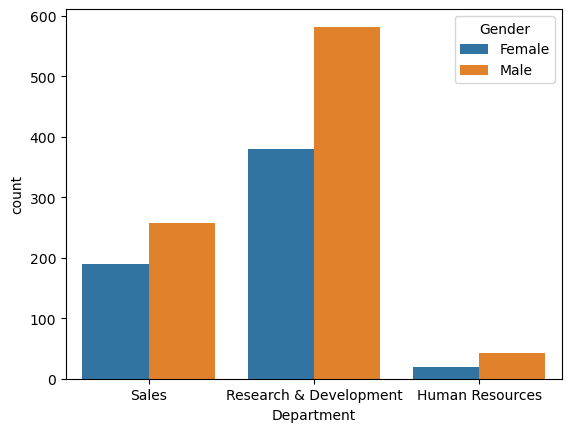

In [17]:
sns.countplot(df , hue = 'Gender' , x = 'Department')

> **in every department male employees is more**

> **Rnd department has maximum number of female candidate**

# **Count of gender as per Educational field**

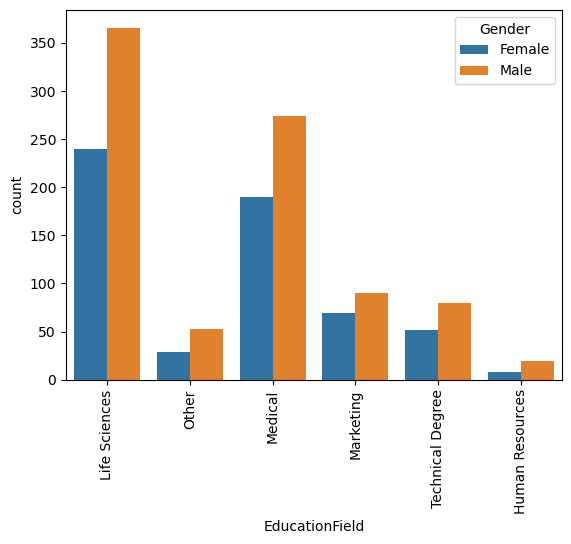

In [18]:
sns.countplot(df , hue = 'Gender' , x = 'EducationField')
plt.xticks(rotation= 90);

> **From Lifescience bcckground maximum Female and Male candidate came**

# **Average age of each gender wrt each department**

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
avg_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['Age'].mean()).reset_index()

<Axes: xlabel='Department', ylabel='Age'>

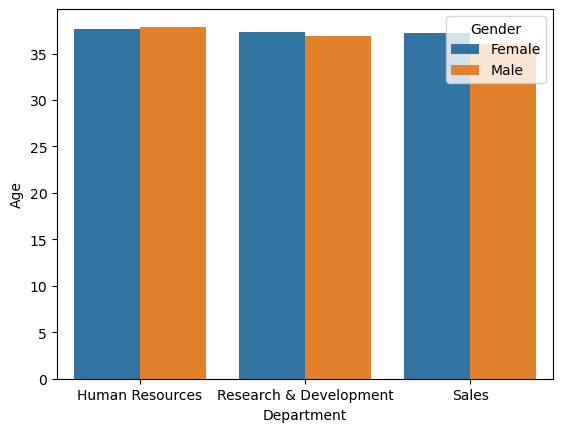

In [21]:
sns.barplot(avg_df,x = 'Department' , hue = 'Gender' , y = 'Age')

> **each deparment having more or less average age trend irrespective of Gender**

# **Trend of hourly rate as per department concern**

<Axes: xlabel='HourlyRate', ylabel='Department'>

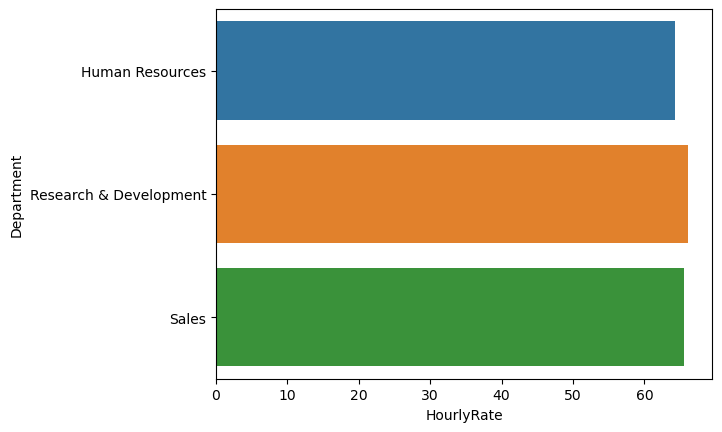

In [22]:
hr_df = pd.DataFrame(df.groupby('Department')['HourlyRate'].mean())
sns.barplot(hr_df , x = 'HourlyRate' , y = hr_df.index)

> **Max hourly rate for their work is in RnD department**

# **Trend of job involvement in each department**

<Axes: xlabel='Department', ylabel='count'>

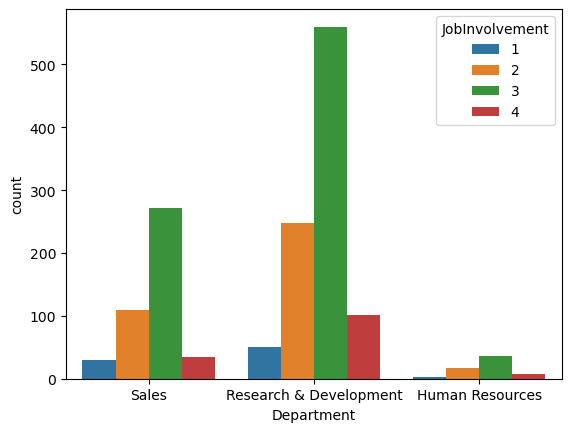

In [23]:
sns.countplot(df , x = 'Department' , hue = 'JobInvolvement')

> **In Rnd department job involvement High Job involvement is there**

> **In sales and HR department also high job involvement is there but not as high as Rnd department**

# **Trend of job role with respect to Age and Department**

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
age_job_df = pd.DataFrame(df.groupby(['JobRole' , 'Department'])['Age'].mean()).reset_index()

<Axes: xlabel='Age', ylabel='JobRole'>

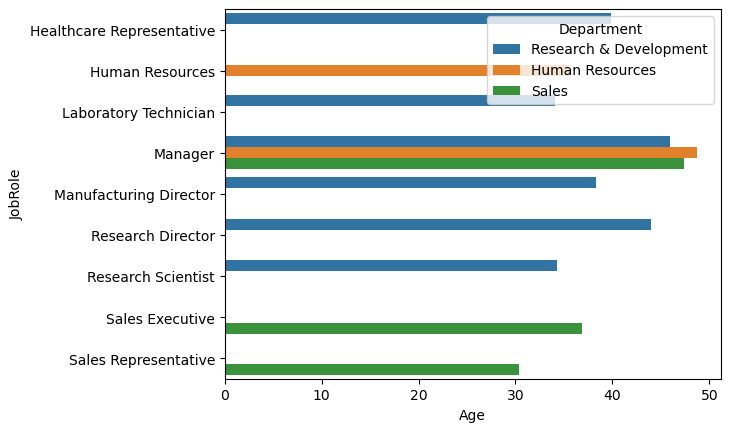

In [26]:
sns.barplot(age_job_df , x = 'Age' , y = 'JobRole' , hue = 'Department')

> **Health care Representative, Manufacturing director, Reasearch Director , Reasearch Scientist are in RnD department**

> **Sales Executive and Sales Manager are in Sales department**

# **Trend of job satisfaction with respect to Department**

<Axes: xlabel='Department', ylabel='count'>

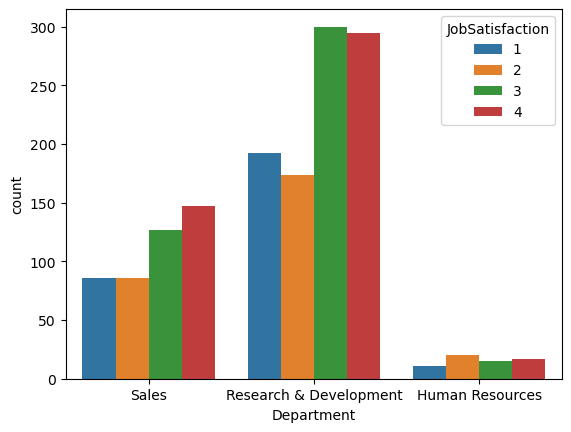

In [27]:
sns.countplot(df , hue = 'JobSatisfaction' , x = 'Department')

> **employees are very happy and satisfied in their position in RnD department and sales department but in Hr department max employees gave 2 * as their satisfaction level**

# **Trend of job satisfaction with respect to job role**

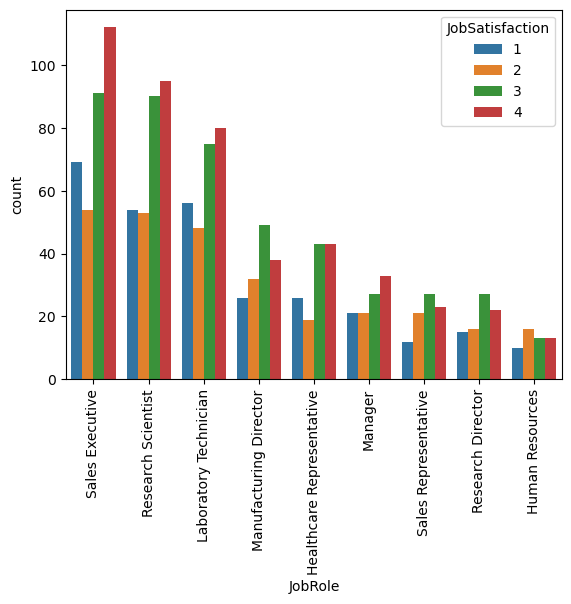

In [28]:
sns.countplot(df , hue = 'JobSatisfaction' , x = 'JobRole')
plt.xticks(rotation = 90);

# **DataFrame for Marital status of each and every gender in each department**

In [29]:
data = pd.DataFrame(df.groupby(['Department' , 'MaritalStatus' , 'Gender'])['Gender'].count())

In [30]:
data.columns = ['count_gender']

In [31]:
data.reset_index()

,Department,MaritalStatus,Gender,count_gender
0,Human Resources,Divorced,Female,4
1,Human Resources,Divorced,Male,12
2,Human Resources,Married,Female,11
3,Human Resources,Married,Male,23
4,Human Resources,Single,Female,5
5,Human Resources,Single,Male,8
6,Research & Development,Divorced,Female,83
7,Research & Development,Divorced,Male,141
8,Research & Development,Married,Female,167
9,Research & Development,Married,Male,266


# **Marital status of employees in different department**

<Axes: xlabel='Department', ylabel='count'>

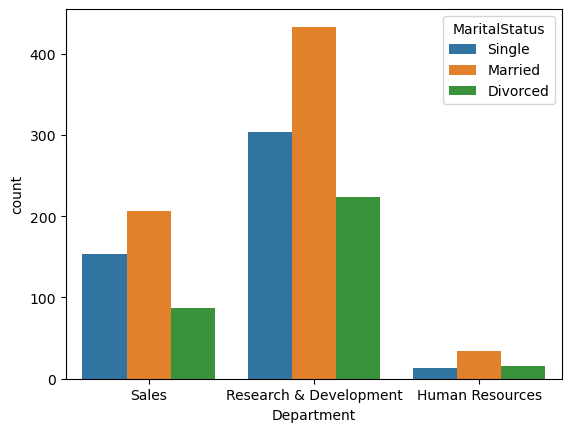

In [32]:
sns.countplot(df , x = 'Department' , hue = 'MaritalStatus')

> **there is many more married employees in the department in RnD department single is macx and in HR it is less**

# **trend of marital status with job role**

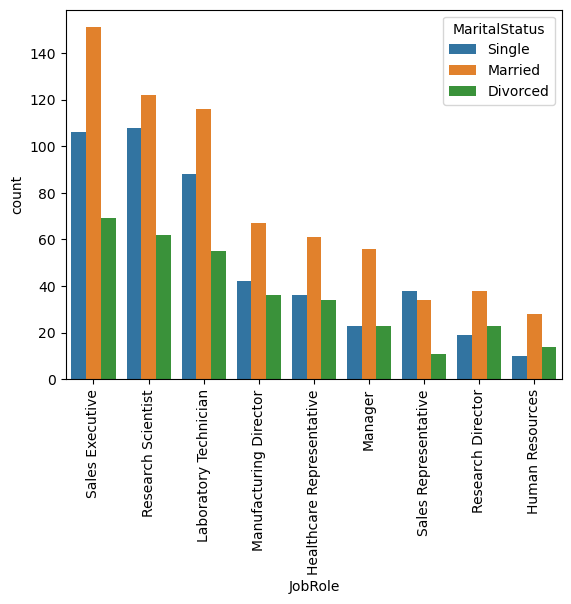

In [33]:
sns.countplot(df , x = 'JobRole' , hue = 'MaritalStatus')
plt.xticks(rotation = 90);

> **only in Sales department the number of single employees more otherwise in every department employee trend is same**

# **Monthly income with respect to department and job role**

In [34]:
month_df = pd.DataFrame(df.groupby(['Department','JobRole'])['MonthlyIncome'].mean()).reset_index()

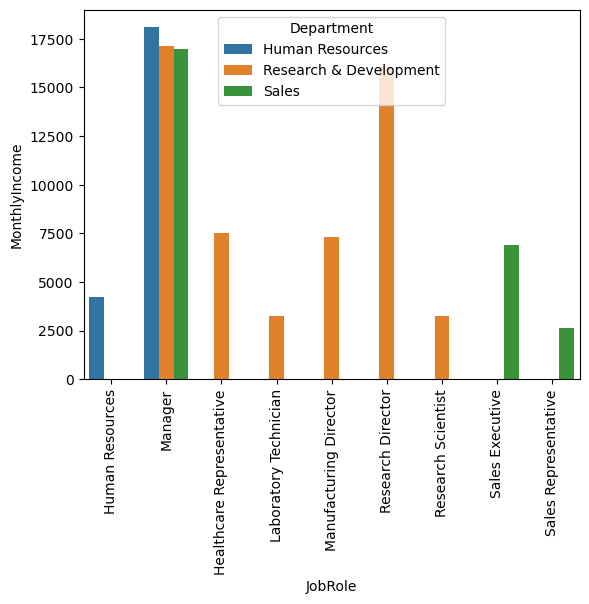

In [35]:
sns.barplot(month_df , x = 'JobRole' , y = 'MonthlyIncome',hue = 'Department')
plt.xticks(rotation = 90);

> **Managers having only high salary**

# **Which educational background have highest salary with respect to gender**

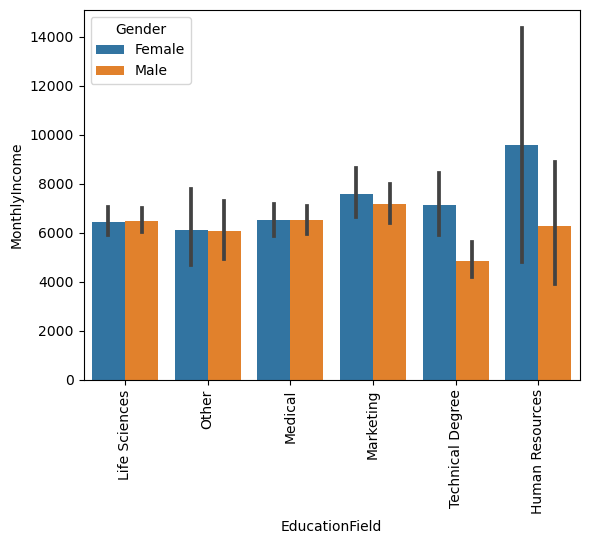

In [36]:
sns.barplot(df , x = 'EducationField' , hue = 'Gender' , y = 'MonthlyIncome')
plt.xticks(rotation = 90);

> **In Technical degree and HR department female has more salary then men**

# **Number of comopanies worked in every department**

In [37]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='NumCompaniesWorked', ylabel='Department'>

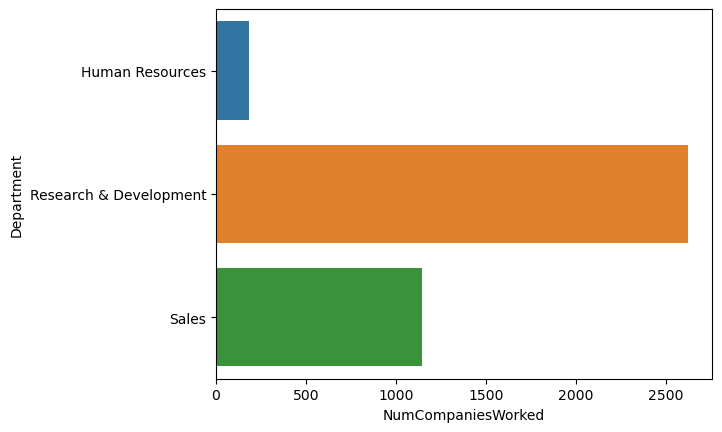

In [38]:
num_df = pd.DataFrame(df.groupby('Department')['NumCompaniesWorked'].sum())
sns.barplot(num_df , x = 'NumCompaniesWorked' , y = num_df.index)

> **under RnD maximum companies are working and under HR department very less number of companies are working**

# **Over time work rate in each and department as per gender type**

In [39]:
ovt_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['OverTime'].count()).reset_index()

<Axes: xlabel='OverTime', ylabel='Department'>

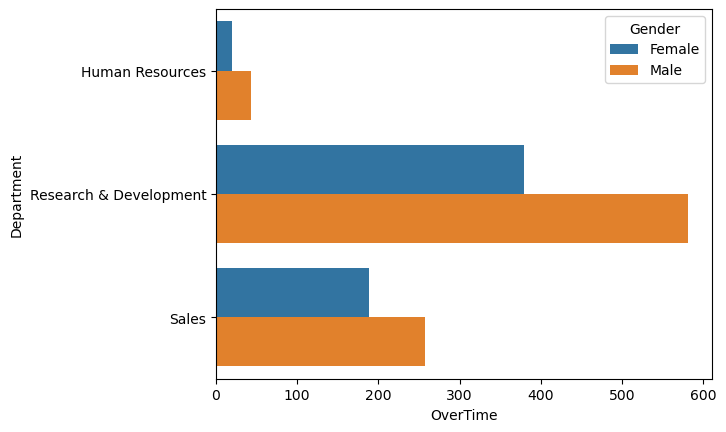

In [40]:
sns.barplot(ovt_df,x = 'OverTime' , y = 'Department' , hue = 'Gender')

> **In HR depaartment Females are worked over time Nd in RnD department Male are doing more overtime**

# **Overtime employees salary visualisation**

In [41]:
movt_df = pd.DataFrame(df.groupby(['Department' , 'OverTime'])['MonthlyIncome'].mean()).reset_index()

<Axes: xlabel='MonthlyIncome', ylabel='Department'>

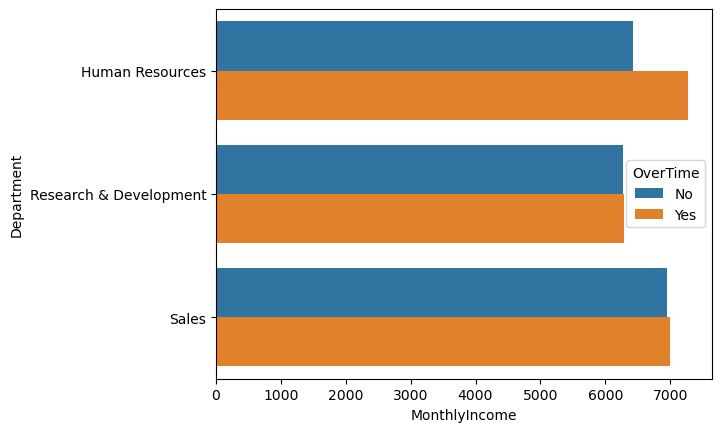

In [42]:
sns.barplot(movt_df , x = 'MonthlyIncome' , y = 'Department' , hue = 'OverTime')

> **In HR department overtime employees are paid way more than normal time employees but in other 2 department that is not that much prominient**

# **PercentSalaryHike as per department with respect to gender**

In [43]:
psh_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['PercentSalaryHike'].mean()).reset_index()

<Axes: xlabel='PercentSalaryHike', ylabel='Department'>

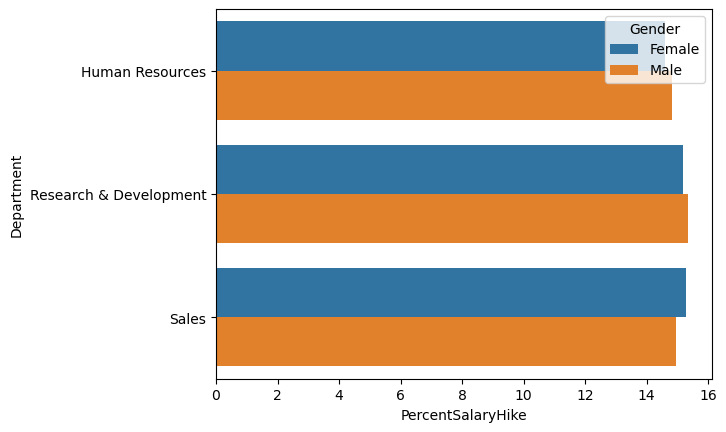

In [44]:
sns.barplot(psh_df , x = 'PercentSalaryHike' , y = 'Department' , hue = 'Gender')

> **Salary hike in each department is more or less same only in Sales department mens salary hike is more than Female**

# **finiding out is there any relation between salary hike and overtime**

In [45]:
opsh_df = pd.DataFrame(df.groupby(['Department' , 'Gender','OverTime'])['PercentSalaryHike'].mean()).reset_index()

<Axes: xlabel='PercentSalaryHike', ylabel='Department'>

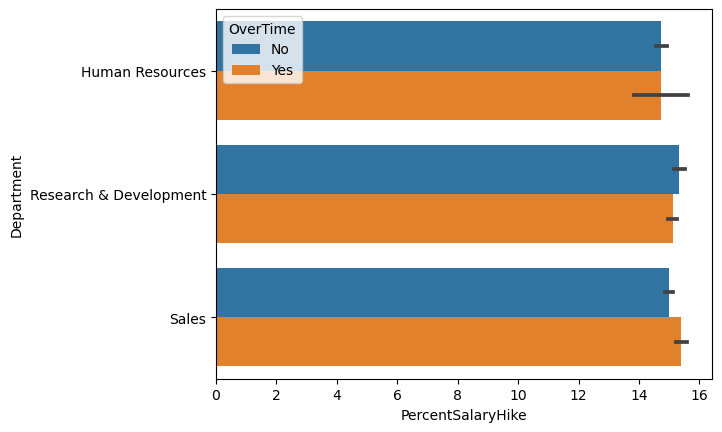

In [46]:
sns.barplot(opsh_df , x = 'PercentSalaryHike' , y = 'Department' , hue = 'OverTime')

> **Only in sales department salary hike is somehow dependent on Overtime but in another department it is not that much prominent**

# **Department wise average performance for employees with respect to gender**

In [47]:
pr_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['PerformanceRating'].mean()).reset_index()

<Axes: xlabel='PerformanceRating', ylabel='Department'>

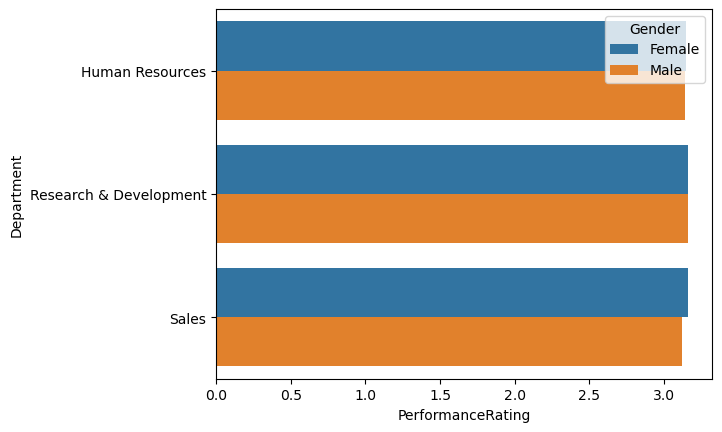

In [48]:
sns.barplot(pr_df , x = 'PerformanceRating' , y = 'Department' , hue = 'Gender')

> **Rating is same for each department except sales department**

# **Performance rating and job satisfaction trend as per department**

In [49]:
jpr_df = pd.DataFrame(df.groupby(['Department' , 'JobSatisfaction'])['PerformanceRating'].mean()).reset_index()

<Axes: xlabel='Department', ylabel='PerformanceRating'>

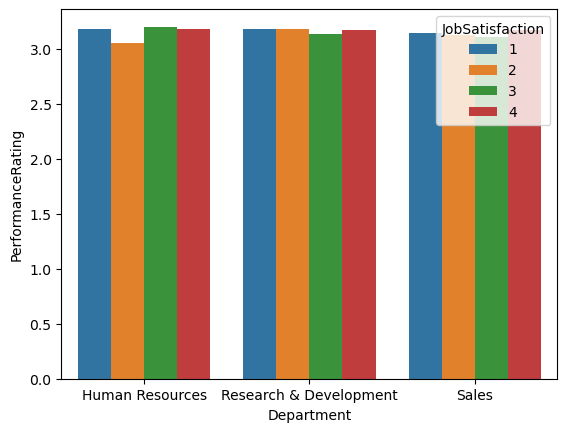

In [50]:
sns.barplot(jpr_df , y = 'PerformanceRating' , x = 'Department' , hue = 'JobSatisfaction')

> **Job satisfaction does not affect average perfomance of the employees**

# **Performance rating and Envo satisfaction trend as per department**

In [51]:
epr_df = pd.DataFrame(df.groupby(['Department' , 'EnvironmentSatisfaction'])['PerformanceRating'].mean()).reset_index()

<Axes: xlabel='Department', ylabel='PerformanceRating'>

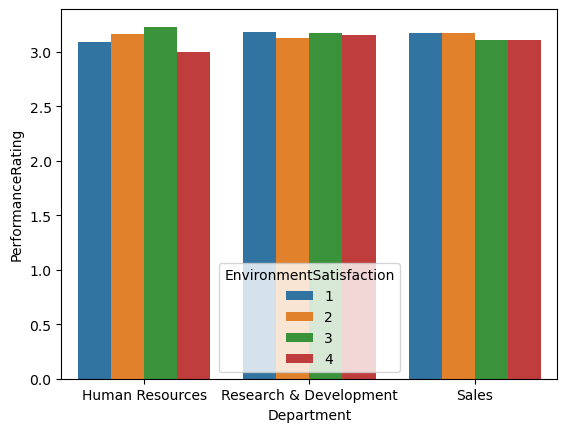

In [52]:
sns.barplot(epr_df , x = 'Department' , hue = 'EnvironmentSatisfaction' , y = 'PerformanceRating')

> **Environment satisfaction also does not having too much affect on the performance of employees**

# **Is there any relation between salary hike and Performance rating with respect to department**

In [53]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
ppr_df = pd.DataFrame(df.groupby(['Department' , 'PerformanceRating'])['PercentSalaryHike'].mean()).reset_index()

<Axes: xlabel='Department', ylabel='PercentSalaryHike'>

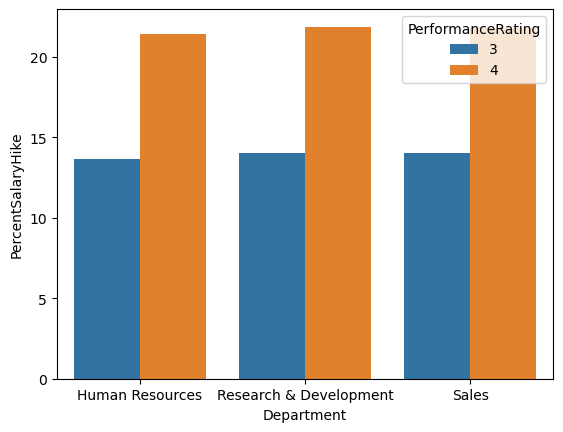

In [55]:
sns.barplot(ppr_df , x = 'Department' , y = 'PercentSalaryHike' , hue = 'PerformanceRating')

> **yes there is relation between percent salary hike and performance those who have good salary having good salary hike**

# **Average relationship satisfaction in each department**

<Axes: xlabel='Department', ylabel='RelationshipSatisfaction'>

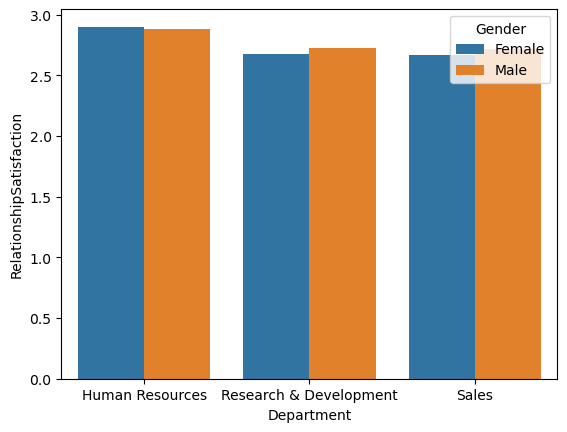

In [56]:
r_df = pd.DataFrame(df.groupby(['Department','Gender'])['RelationshipSatisfaction'].mean()).reset_index()
sns.barplot(r_df , x = 'Department' , y = 'RelationshipSatisfaction' , hue = 'Gender')

> **In HR department relationship satisfaction is more irrespective of gender**

# **Average relationship satisfaction in each department as per Enviroment satisfaction**

<Axes: xlabel='Department', ylabel='RelationshipSatisfaction'>

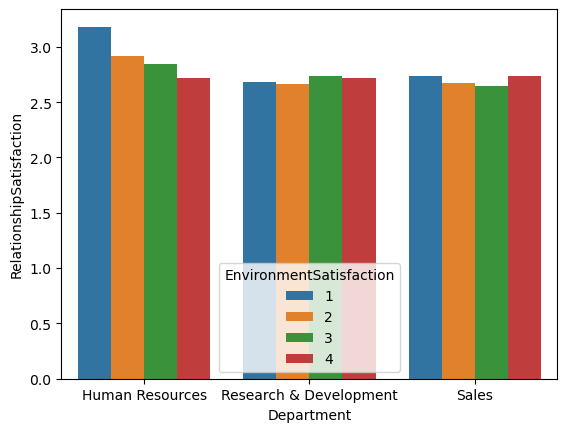

In [57]:
e_df = pd.DataFrame(df.groupby(['Department','EnvironmentSatisfaction'])['RelationshipSatisfaction'].mean()).reset_index()
sns.barplot(e_df , x = 'Department' , y = 'RelationshipSatisfaction' , hue = 'EnvironmentSatisfaction')

> **Environment satisfaction is a big role in HR department personal relation but it is not the case for other department**

# **Job satisfaction trend with personal relationship with respect to each department**

<Axes: xlabel='Department', ylabel='RelationshipSatisfaction'>

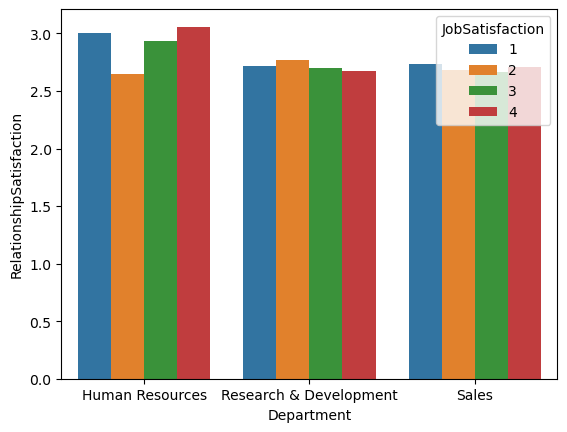

In [58]:
j_df = pd.DataFrame(df.groupby(['Department','JobSatisfaction'])['RelationshipSatisfaction'].mean()).reset_index()
sns.barplot(j_df , x = 'Department' , y = 'RelationshipSatisfaction' , hue = 'JobSatisfaction')

> **There is a good sign the job satisfaction is not affecting personal relationships**

# **Average working hours for male and female in each department**

In [59]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Department', ylabel='StandardHours'>

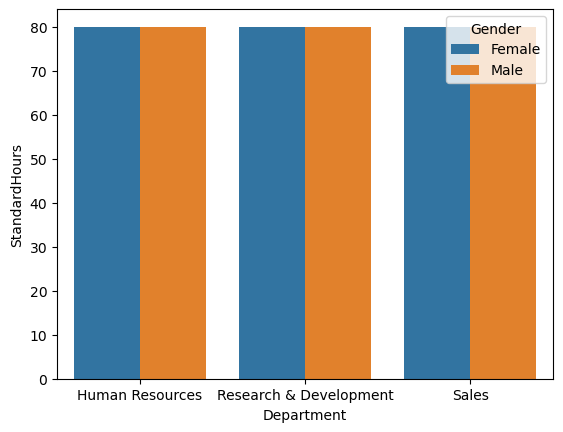

In [60]:
a_df = pd.DataFrame(df.groupby(['Gender' , 'Department'])['StandardHours'].mean()).reset_index()
sns.barplot(a_df , x = 'Department' , y = 'StandardHours' , hue = 'Gender')

> **every employee has maintain the strict policy of working hours**

# **Total working years with respect to each department and gender**

<Axes: xlabel='Department', ylabel='TotalWorkingYears'>

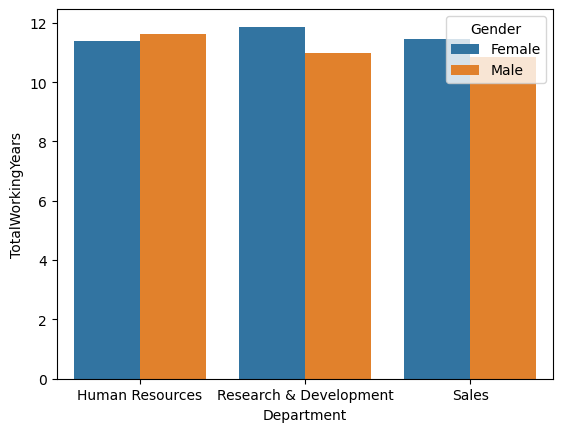

In [61]:
y_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['TotalWorkingYears'].mean()).reset_index()
sns.barplot(y_df , x = 'Department' , hue = 'Gender' , y = 'TotalWorkingYears')

> **Except Human resource department female are having high work experience than male**

# **Is there any relation between salary hike and department and total working years**

In [62]:
s_df = pd.DataFrame(df.groupby('Department')[['PercentSalaryHike' , 'StandardHours']].mean())
s_df

,PercentSalaryHike,StandardHours
Department,,
Human Resources,14.761905,80.0
Research & Development,15.291363,80.0
Sales,15.096413,80.0


> **In RnD department percentage salary hike is more for same amount of Standard hours**

# **Average training time last year as per department with respect to gender**

In [63]:
t_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['TrainingTimesLastYear'].mean()).reset_index()

<Axes: xlabel='TrainingTimesLastYear', ylabel='Department'>

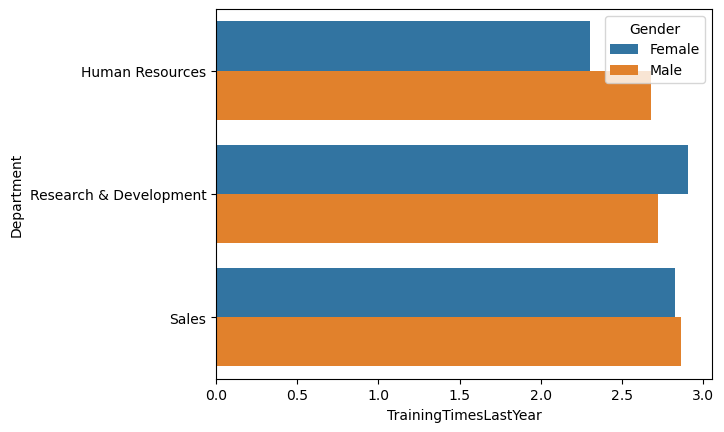

In [64]:
sns.barplot(t_df , x = 'TrainingTimesLastYear' , y = 'Department' ,hue = 'Gender')

> **In RnD department only female got more trainig time last year but all the other department we got less female trainig time**

# **training time as per educational background concern with respect to gender**

In [65]:
eb_df = pd.DataFrame(df.groupby(['EducationField' , 'Gender'])['TrainingTimesLastYear'].mean()).reset_index()

<Axes: xlabel='TrainingTimesLastYear', ylabel='EducationField'>

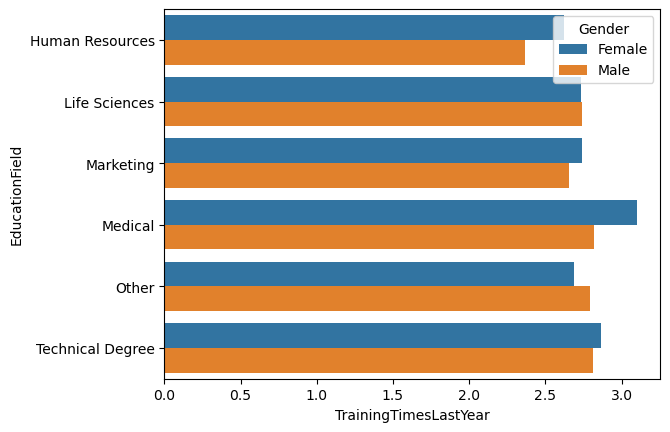

In [66]:
sns.barplot(eb_df , x = 'TrainingTimesLastYear' , hue = 'Gender' , y = 'EducationField')

> **From HR, Medical, Marketing, Technical degree female need more degree**

# **Work life balaces as per department with respect to gender**

In [67]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

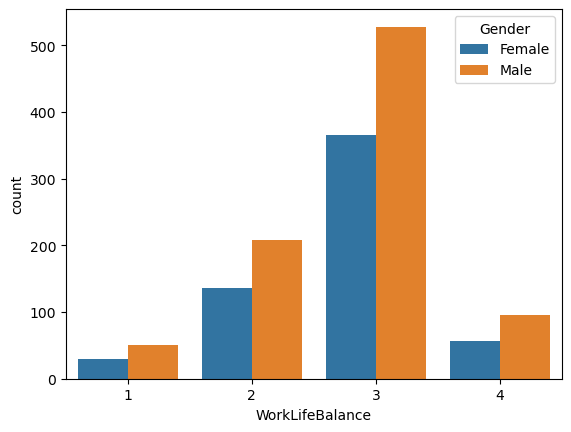

In [68]:
sns.countplot(df , x = 'WorkLifeBalance' , hue = 'Gender')

> **There are many employees who give 3 star**

# **Work life balance in each department**

In [69]:
w_df = pd.DataFrame(df.groupby('Department')['WorkLifeBalance'].mean())

<Axes: xlabel='WorkLifeBalance', ylabel='Department'>

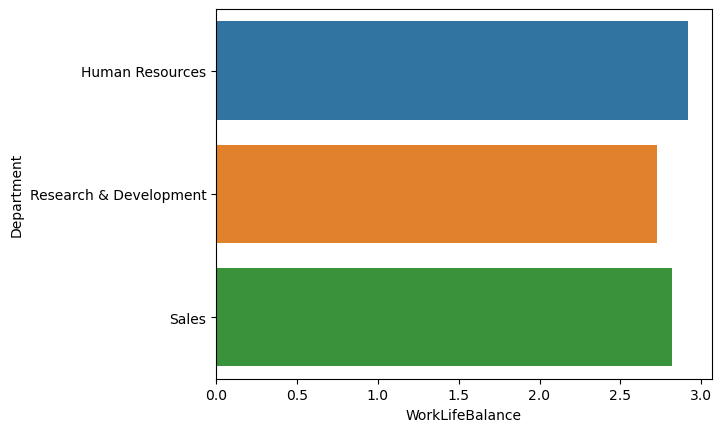

In [70]:
sns.barplot(w_df , x = 'WorkLifeBalance' , y = w_df.index)

> **Work lofe balance is there in eacgh department but in HR it is more**

# **Average years at company in each department for each gender**

In [71]:
yac_df = pd.DataFrame(df.groupby(['Gender' , 'Department'])['YearsAtCompany'].mean()).reset_index()

<Axes: xlabel='Department', ylabel='YearsAtCompany'>

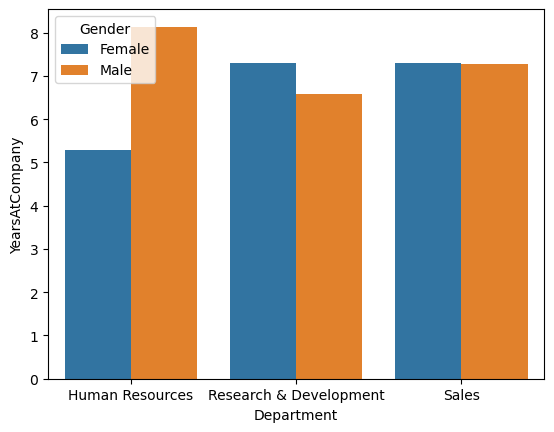

In [72]:
sns.barplot(yac_df , x = 'Department' , hue = 'Gender' , y = 'YearsAtCompany')

> **Average year at compny for male is 8 years in Hr department andf in RnD and Sales department it is 6 to 7 years on an average**

> **In Rnd department Female has more years at company value**

# **As per the job role avg years at company**

In [73]:
jr_df = pd.DataFrame(df.groupby('JobRole')['YearsAtCompany'].mean())

<Axes: xlabel='YearsAtCompany', ylabel='JobRole'>

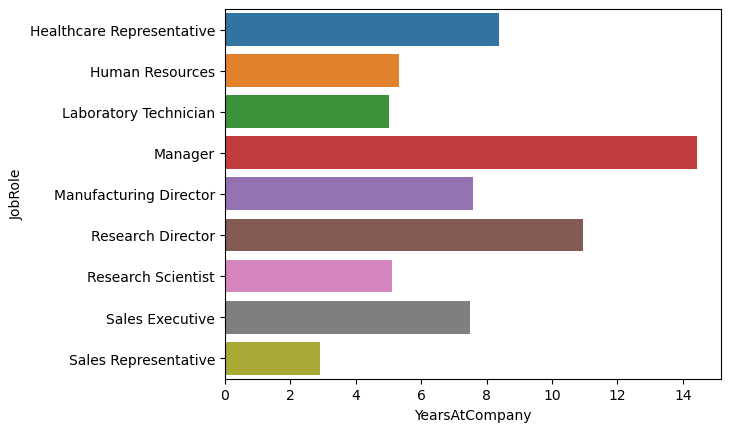

In [74]:
sns.barplot(jr_df , x = 'YearsAtCompany' , y = jr_df.index)

> **Manager having very high years experience**

> **after that it is Research Director**

# **Years in current role as per job role**

In [75]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [76]:
yicr_df = pd.DataFrame(df.groupby('JobRole')['YearsInCurrentRole'].mean())

<Axes: xlabel='YearsInCurrentRole', ylabel='JobRole'>

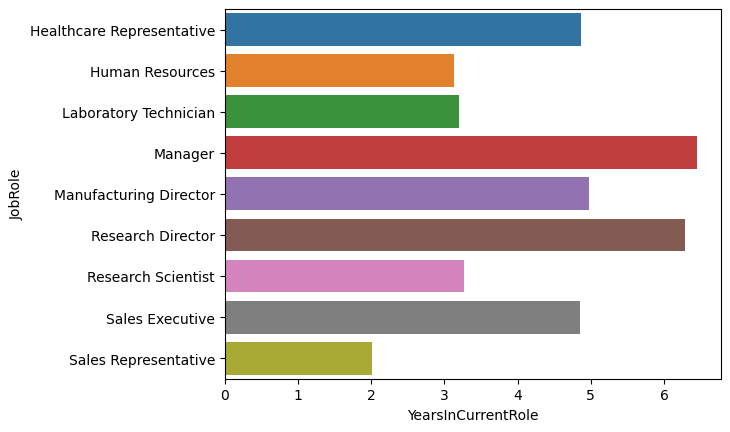

In [77]:
sns.barplot(yicr_df , x = 'YearsInCurrentRole' , y = yicr_df.index)

> **Managers are still there in current role for the heighest amount of time Then reasearch Director**

In [78]:
yicr1_df = pd.DataFrame(df.groupby(['JobRole' , 'Department'])['YearsInCurrentRole'].mean()).reset_index()

<Axes: xlabel='YearsInCurrentRole', ylabel='JobRole'>

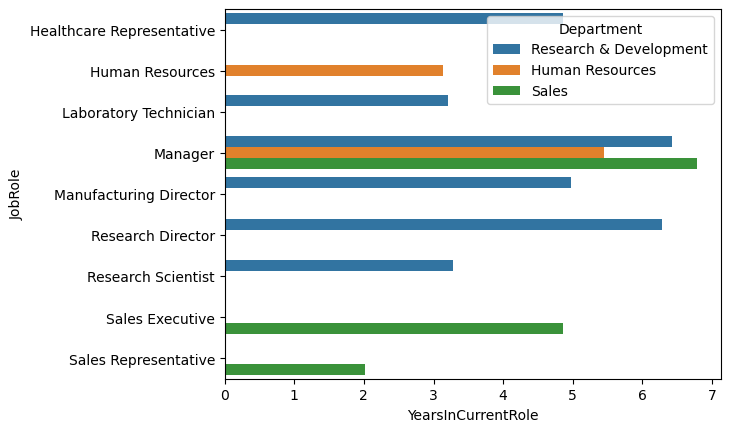

In [79]:
sns.barplot(yicr1_df , x = 'YearsInCurrentRole' , y = 'JobRole' , hue = 'Department')

> **In all the department manager having high retension in one role**

# **Each department takesa how much time to promote their employee**

In [80]:
p_df = pd.DataFrame(df.groupby(['Department' , 'Gender'])['YearsSinceLastPromotion'].mean()).reset_index()

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Department'>

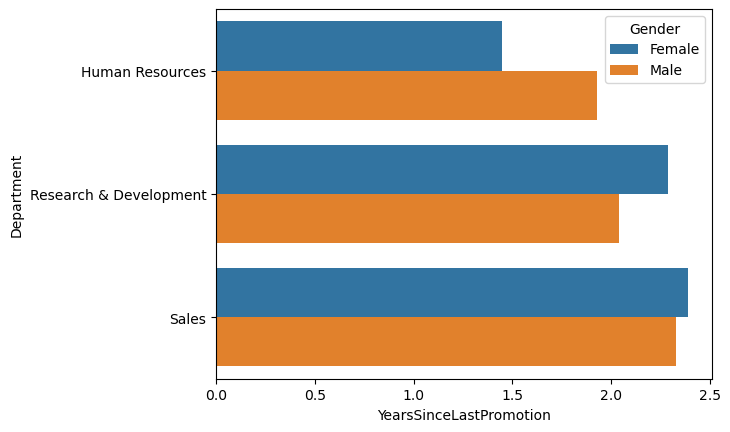

In [81]:
sns.barplot(p_df , x = 'YearsSinceLastPromotion' , y = 'Department' , hue = 'Gender')

> **Sales department takes more time to promote their employee**

> **Except HR department Females are promoted fastt**

# **Each job role takes how many time to get promoted**

In [82]:
jrp_df = pd.DataFrame(df.groupby('JobRole')['YearsSinceLastPromotion'].mean())

<Axes: xlabel='YearsSinceLastPromotion', ylabel='JobRole'>

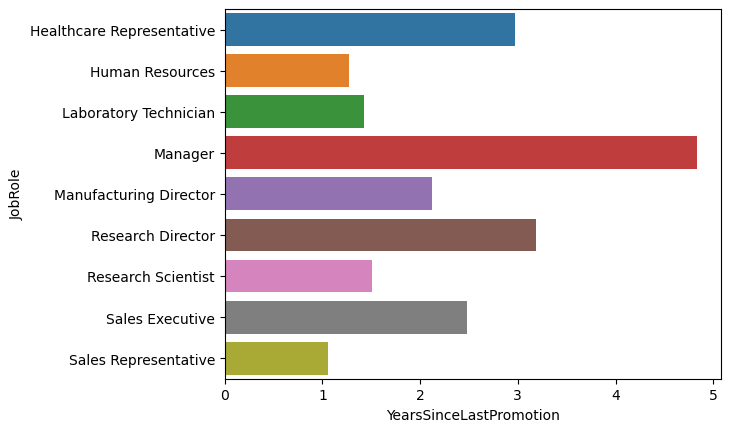

In [83]:
sns.barplot(jrp_df , x = 'YearsSinceLastPromotion' , y = jrp_df.index)

> **manager post take more time to get promoted**